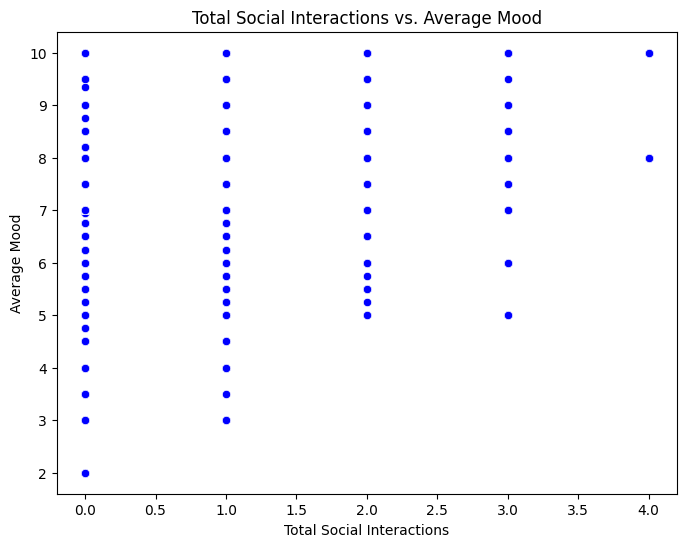

In [4]:
# -*- coding: utf-8 -*-
"""Welcome To Colab

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/notebooks/intro.ipynb
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file with all sheets
all_sheets = pd.read_excel("data.xlsx", sheet_name=None)

# List of days in a week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Function to check if 'Who' column mentions friend or family
def is_social(person):
    if pd.isna(person):
        return 0
    text = str(person).lower()
    return int('friend' in text or 'family' in text)

# Create a list to collect cleaned data from all sheets
all_data = []

# Loop through each sheet in the Excel file
for name, df in all_sheets.items():

    # Skip metadata or unnecessary top rows, and drop empty or duplicate rows
    df = df.iloc[4:].dropna(how='all').drop_duplicates().reset_index(drop=True)

    # Skip this sheet if it's empty after cleaning
    if df.empty:
        continue

    # Define expected column structure: one for each time and (Activity, Who, Where, Mood, Extra) for every day
    col_names = ["Time", "Activity", "Who", "Where", "Mood", "Extra"]
    new_cols = ["Time"]

    # Build the column names by iterating through days and sub-columns
    for day in days:
        for col in col_names[1:]:  # Skip "Time" as it's only once at the start
            new_cols.append(f"{day}_{col}")

    # Keep only the expected number of columns and rename them
    df = df.iloc[:, :len(new_cols)]
    df.columns = new_cols[:df.shape[1]]

    # Loop through each day to mark social interactions (friends or family)
    for day in days:
        who_col = f"{day}_Who"
        social_col = f"{day}_Social"

        if who_col in df.columns:
            # Apply the is_social function to determine if the entry is a social interaction
            df[social_col] = df[who_col].apply(is_social)

    # Collect all mood columns across the week that exist in the DataFrame
    mood_cols = []
    for day in days:
        mood_col = f"{day}_Mood"
        if mood_col in df.columns:
            mood_cols.append(mood_col)

    # Convert all mood entries to numeric values to enable calculations
    df[mood_cols] = df[mood_cols].apply(pd.to_numeric, errors='coerce')

    # Compute the average mood across all days for each row
    df["Average_Mood"] = df[mood_cols].mean(axis=1)

    # Collect all social interaction flags across the week that exist
    social_cols = []
    for day in days:
        social_col = f"{day}_Social"
        if social_col in df.columns:
            social_cols.append(social_col)

    # Sum up the number of social interactions in the week for each row
    df["Total_Social"] = df[social_cols].sum(axis=1)

    # Append the processed DataFrame to the master list
    all_data.append(df)

# Combine all sheets into one DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Visualize the relationship between total social interactions and average mood
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_df, x='Total_Social', y='Average_Mood', color='blue')
plt.title("Total Social Interactions vs. Average Mood")
plt.xlabel("Total Social Interactions")
plt.ylabel("Average Mood")
plt.show()

